In [517]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [435]:
#Unpickle file 
modeling_df = pd.read_pickle("./cleaned_data.pkl")

In [436]:
df = modeling_df

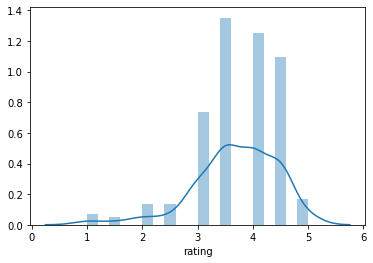

In [64]:
sns.distplot(df.rating, bins=20);

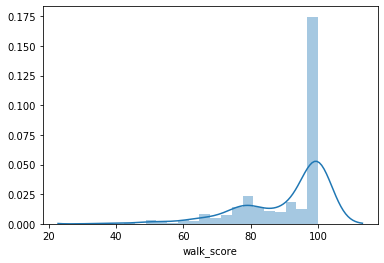

In [56]:
sns.distplot(modeling_df.walk_score, bins=20);

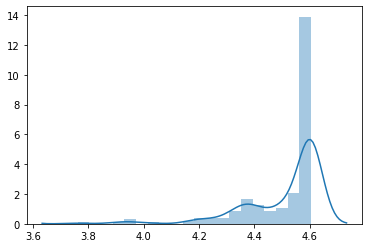

In [85]:
import math #not an improvement
log_walk_score = [math.log(d) for d in df ['walk_score']]
sns.distplot(log_walk_score, bins=20);

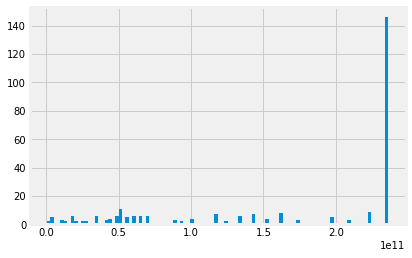

In [374]:
transform = np.asarray(df[['walk_score']].values)
    
    # transform values and store as "dft"
dft = stats.boxcox(transform)[0]

plt.hist(dft, bins=100)
plt.show()

In [402]:
separating walk_score into perfect and imperfect
df['walkability'] = [np.random.choice(('perfect', 'less_perfect')) for i in range(df.shape[0])]
dummies = pd.get_dummies(df['walkability'])

In [437]:
def walkability (row):
    if row['walk_score'] == 100 :
          return 'walk_perfect'
    if row['walk_score'] < 100 :
          return 'walk_imperfect'
df.apply (lambda row: walkability(row), axis=1)
df['walkability'] = df.apply (lambda row: walkability(row), axis=1)


In [440]:
dummies = pd.get_dummies(df['walkability'])
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.drop(['walkability'], inplace=True, axis=1)

In [449]:
df.drop(['walk_imperfect'], inplace=True, axis=1)

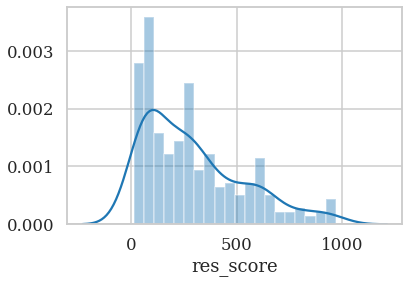

In [29]:
sns.distplot(modeling_df.res_score, bins=20);

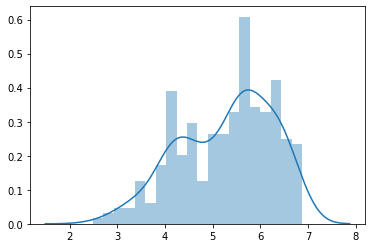

In [71]:
#logged restaurant score
import math
log_res_score = [math.log(d) for d in df ['res_score']]
sns.distplot(log_res_score, bins=20);

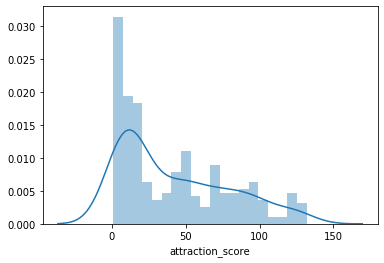

In [60]:
sns.distplot(modeling_df.attraction_score, bins=20);

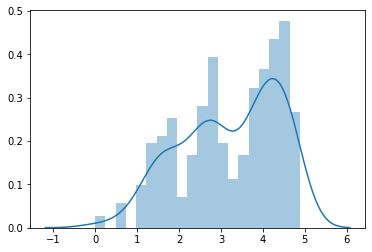

In [72]:
#logged attraction score
log_attraction_score = [math.log(d) for d in df ['attraction_score']]
sns.distplot(log_attraction_score, bins=20);

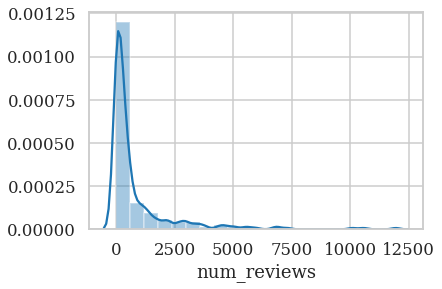

In [32]:
#num_reviews
sns.distplot(modeling_df.num_reviews, bins=20);

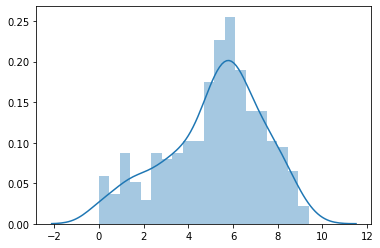

In [73]:
#logged reviews
log_num_reviews = [math.log(d) for d in df ['num_reviews']]
sns.distplot(log_num_reviews, bins=20);

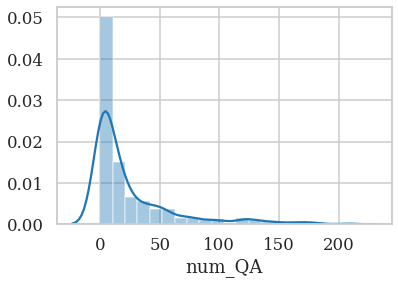

In [33]:
sns.distplot(modeling_df.num_QA, bins=20);

In [193]:
#imputing 0 with 1 - don't have to use fillna
df['num_QA']=df.num_QA.mask(df.num_QA == 0, 1)
df['num_Tips']=df.num_QA.mask(df.num_QA == 0, 1)

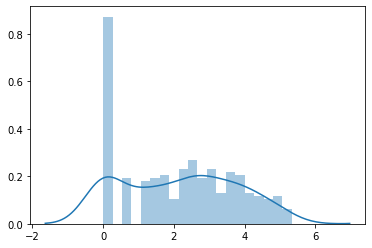

In [194]:
#logged QA
import math
log_num_QA = [math.log(d) for d in df ['num_QA']]
sns.distplot(log_num_QA, bins=20);

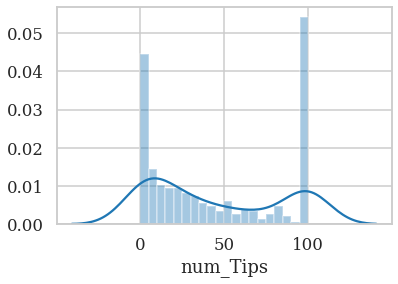

In [34]:
#num_Tips
sns.distplot(modeling_df.num_Tips, bins=20);

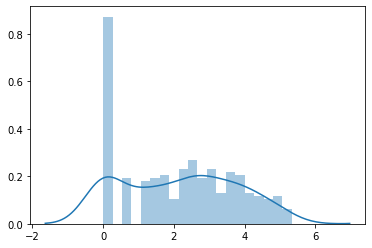

In [197]:
#logged tips
log_num_Tips = [math.log(d) for d in df ['num_Tips']]
sns.distplot(log_num_Tips, bins=20);

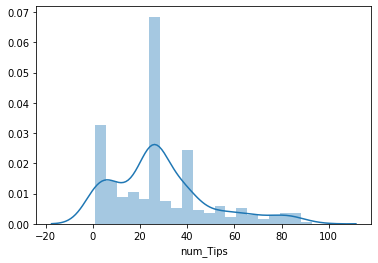

In [14]:
#num_Tips after imputation (replacing 0s with median)
sns.distplot(modeling_df.num_Tips, bins=20);

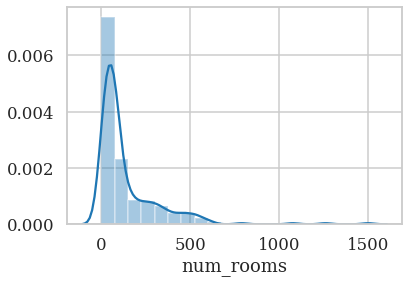

In [41]:
sns.distplot(modeling_df.num_rooms, bins=20);

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


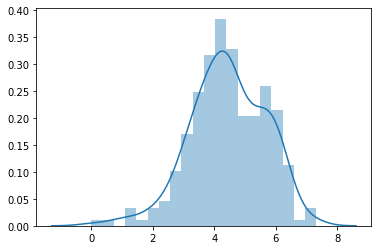

In [80]:
#logged rooms
log_num_rooms = [math.log(d) for d in df ['num_rooms']]
sns.distplot(log_num_rooms, bins=20);

In [42]:
modeling_df.num_rooms.describe()
# modeling_df.num_rooms.max()

count    163.000000
mean      81.226994
std       83.425379
min        1.000000
25%       30.000000
50%       58.000000
75%       89.500000
max      557.000000
Name: num_rooms, dtype: float64

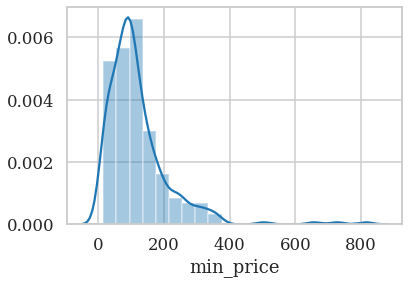

In [54]:
sns.distplot(modeling_df.min_price, bins=20);

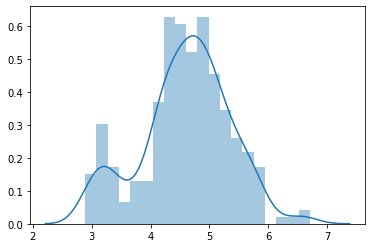

In [81]:
#logged min price
log_min_price = [math.log(d) for d in df ['min_price']]
sns.distplot(log_min_price, bins=20);

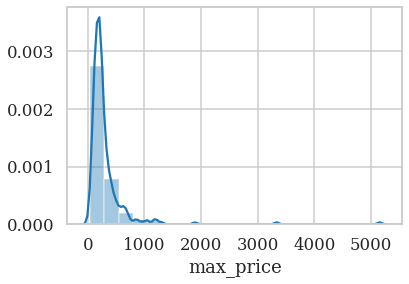

In [43]:
sns.distplot(modeling_df.max_price, bins=20);

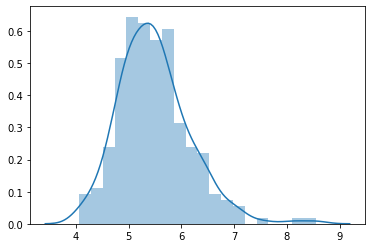

In [82]:
#logged max price
log_max_price = [math.log(d) for d in df ['max_price']]
sns.distplot(log_max_price, bins=20);

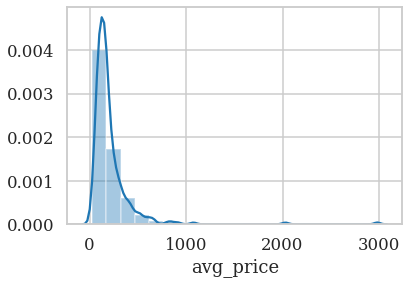

In [44]:
sns.distplot(modeling_df.avg_price, bins=20);

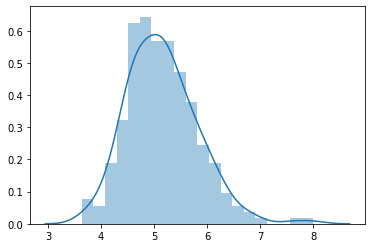

In [83]:
#logged avg price
log_avg_price = [math.log(d) for d in df ['avg_price']]
sns.distplot(log_avg_price, bins=20);

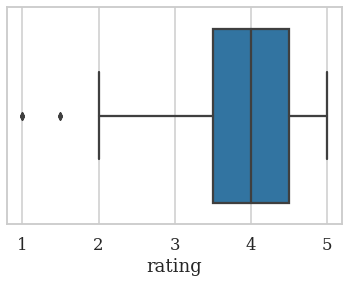

In [45]:
sns.boxplot(modeling_df.rating)

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


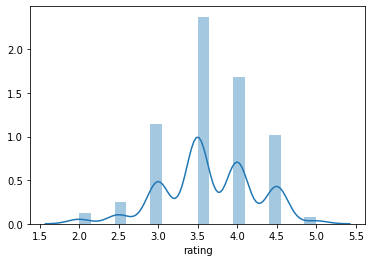

In [23]:
sns.distplot(modeling_df.rating, bins=20);

In [48]:
df.corr()

,rating,walk_score,res_score,attraction_score,num_reviews,num_QA,num_Tips,num_rooms,min_price,max_price,avg_price
rating,1.000000,0.231890,0.209502,0.217746,0.271871,0.305236,0.284588,0.172194,0.379191,0.259721,0.293190
walk_score,0.231890,1.000000,0.624889,0.617027,0.185594,0.179990,0.259243,0.098640,0.098056,0.076918,0.083888
res_score,0.209502,0.624889,1.000000,0.921711,0.048756,-0.012322,0.035068,-0.062722,0.028078,0.003059,0.008329
attraction_score,0.217746,0.617027,0.921711,1.000000,0.037212,-0.027074,0.009498,-0.070330,0.013977,0.000970,0.003689
num_reviews,0.271871,0.185594,0.048756,0.037212,1.000000,0.844836,0.613442,0.771883,0.498914,0.312202,0.361334
num_QA,0.305236,0.179990,-0.012322,-0.027074,0.844836,1.000000,0.699920,0.740826,0.463877,0.254837,0.306637
num_Tips,0.284588,0.259243,0.035068,0.009498,0.613442,0.699920,1.000000,0.559949,0.460093,0.262780,0.312427
num_rooms,0.172194,0.098640,-0.062722,-0.070330,0.771883,0.740826,0.559949,1.000000,0.403562,0.204921,0.252882
min_price,0.379191,0.098056,0.028078,0.013977,0.498914,0.463877,0.460093,0.403562,1.000000,0.798397,0.867072
max_price,0.259721,0.076918,0.003059,0.000970,0.312202,0.254837,0.262780,0.204921,0.798397,1.000000,0.992239


In [56]:
df.columns

Index(['hotel_name', 'rating', 'walk_score', 'res_score', 'attraction_score',
       'num_reviews', 'num_QA', 'num_Tips', 'num_rooms', 'min_price',
       'max_price', 'avg_price'],
      dtype='object')

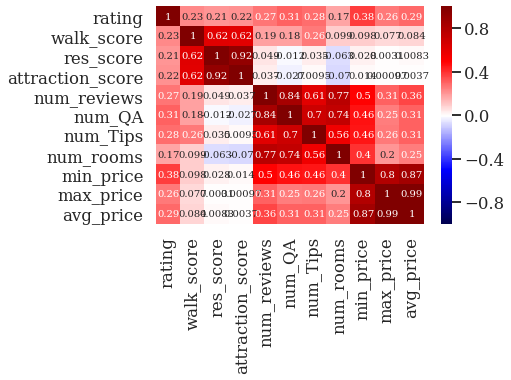

In [53]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

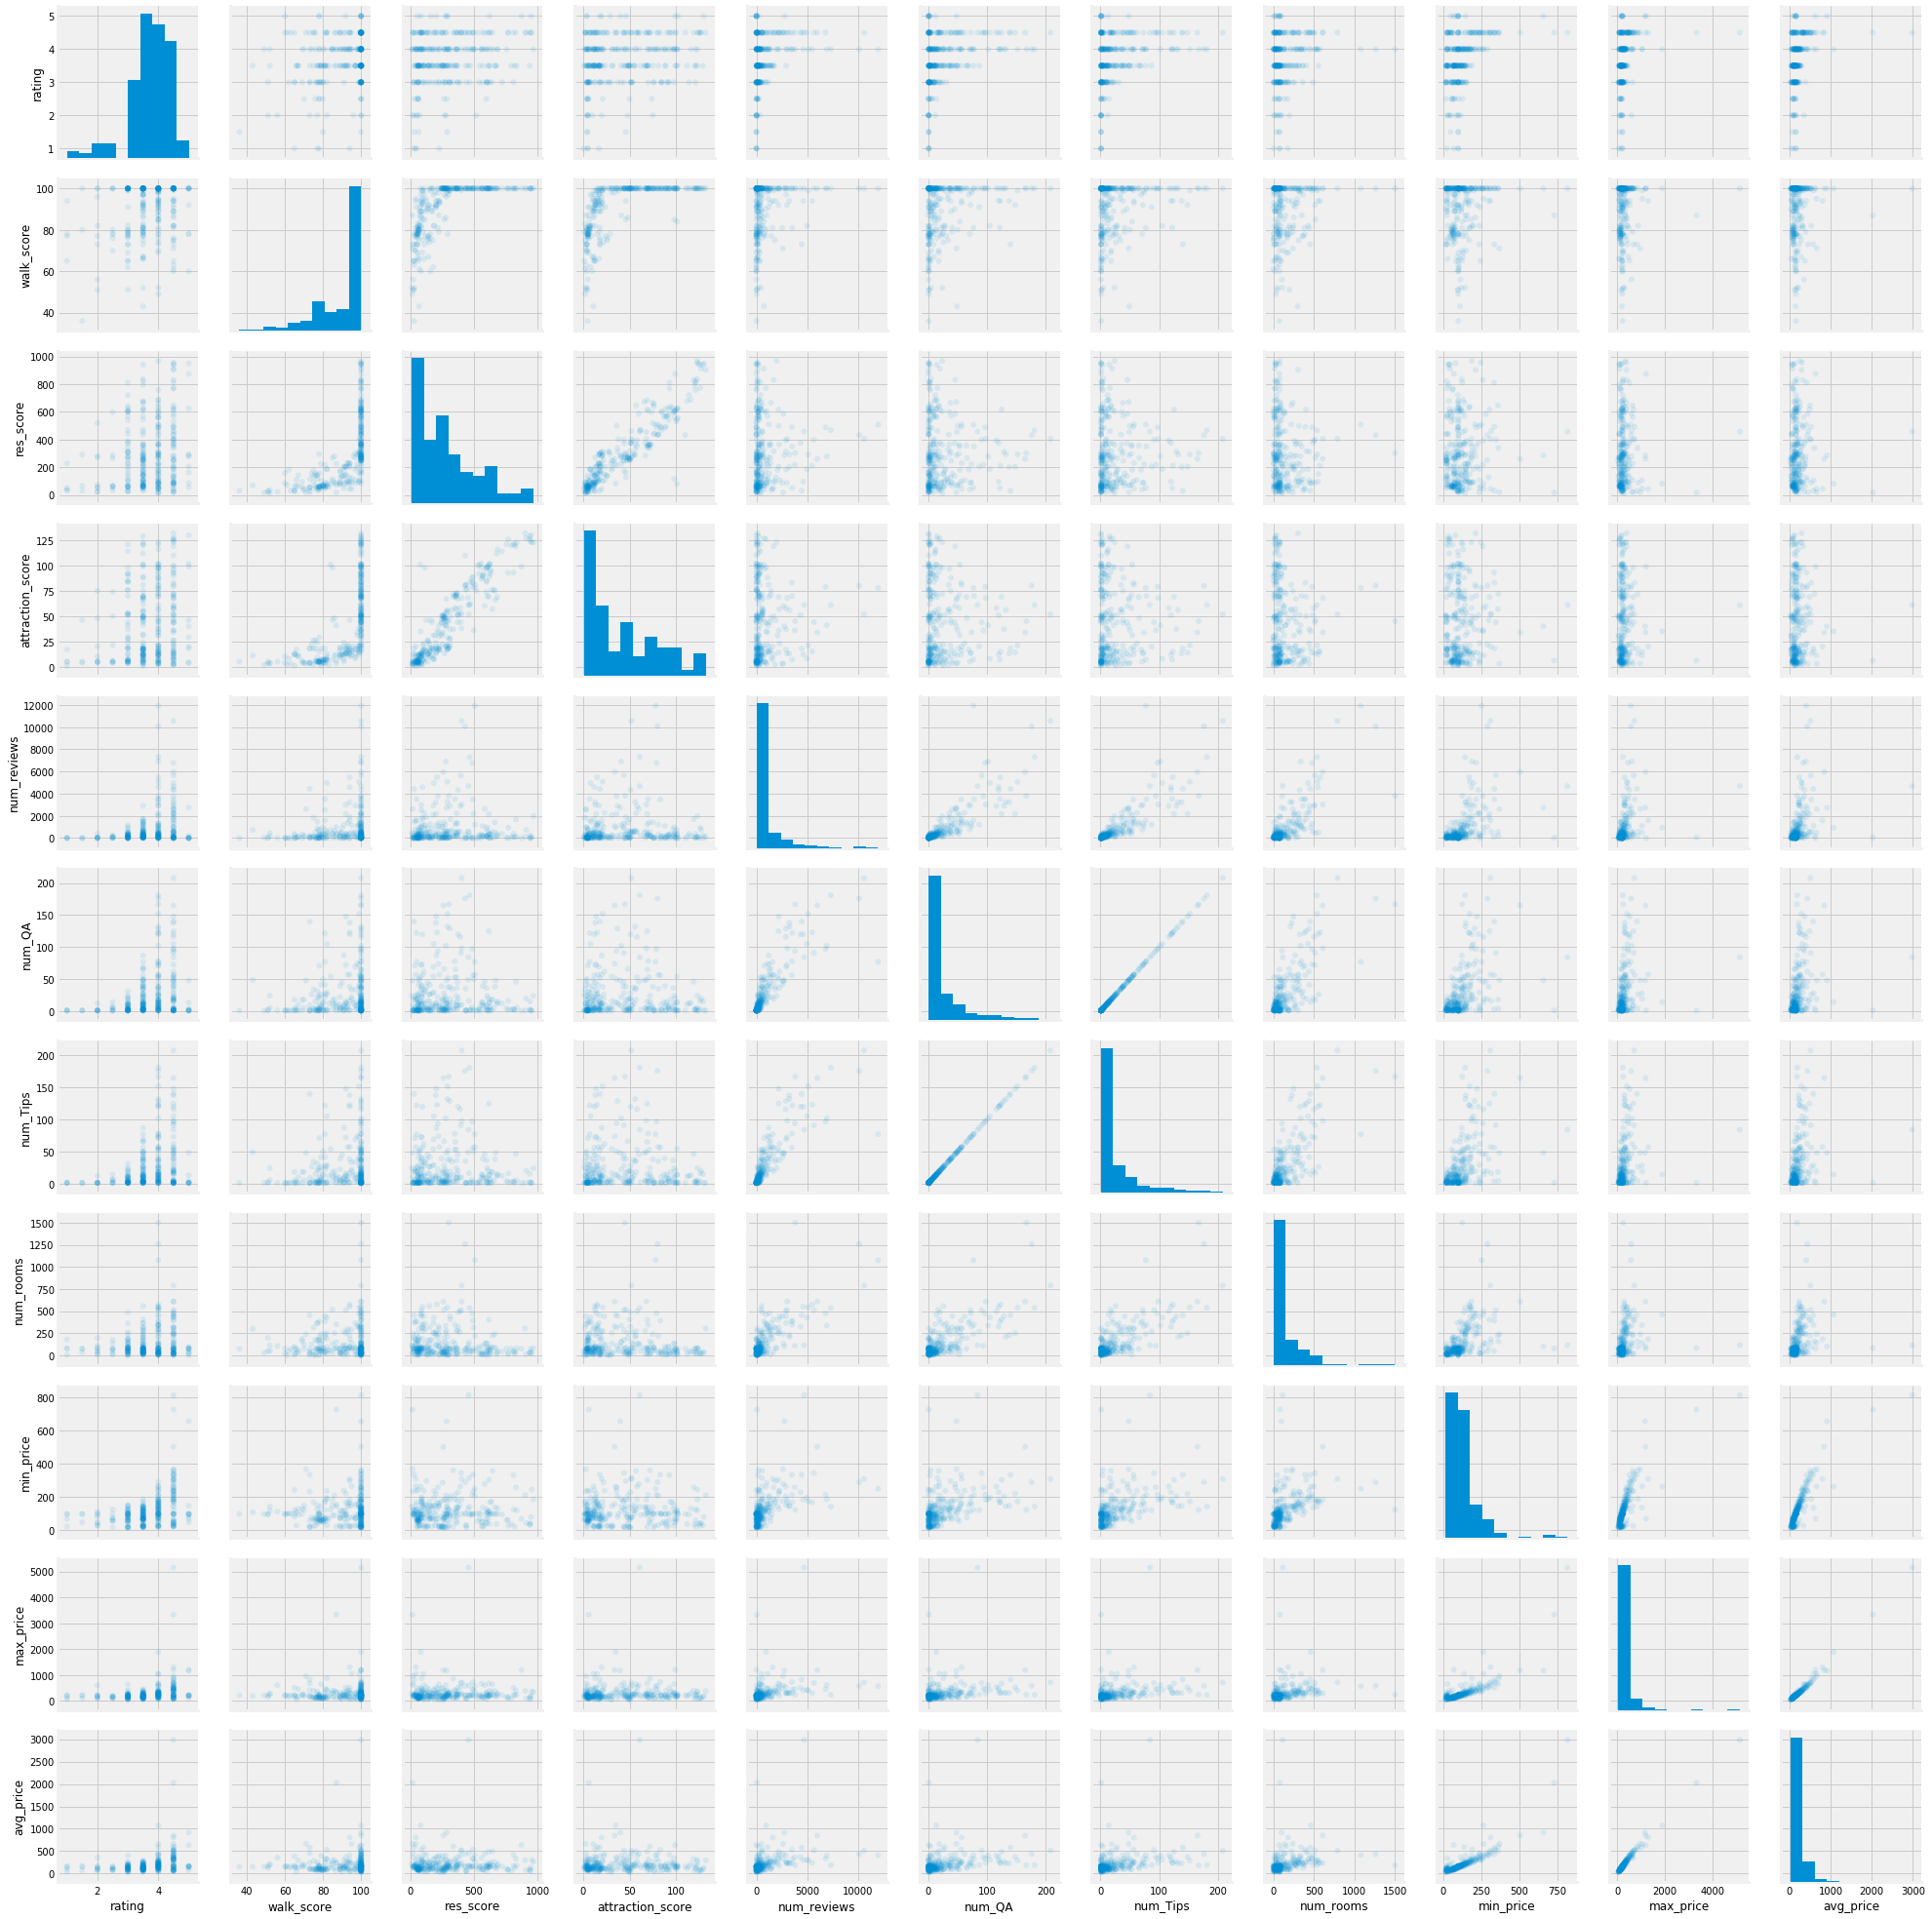

In [262]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'));
             #height=1.2, aspect=1.2);